In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.unet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 

json_file = "configs/unet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: dice_coeff
batch_size: 2
checkpoint_dir: ./experiments\unet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: unet_kittiroad
final_model_dir: ./experiments\unet_kittiroad\saved_model/
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 5
num_iter_per_epoch: 50
summary_dir: ./experiments\unet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 480, 3)
Size of masks collection :  (578, 320, 480)


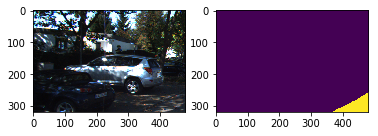

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
tf.reset_default_graph()

model = UNetModel(config)
model.build() 

Model built successfully.


In [4]:
# create a builder for saving the model 
builder = tf.saved_model.builder.SavedModelBuilder(config.final_model_dir)

In [5]:
with tf.Session() as sess : 
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    trainer.train()
    model.load(sess)
    print("Saving the final model..")
    builder.add_meta_graph_and_variables(sess,
                                       [tf.saved_model.tag_constants.TRAINING],
                                       signature_def_map=None,
                                       assets_collection=None)
builder.save()
print("Final model saved")

Variables initialized
Epoch  0


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:14<00:00,  1.49s/it]


-->Last epoch loss     :  1.2483443
-->Last epoch accuracy :  0.14504653
-->Last test loss      :  0.9043736
-->Last test accuracy  :  0.31063315
[BEST LOST : 0.9043735861778259]
Saving model...
Model saved
Epoch  1


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:15<00:00,  1.53s/it]


-->Last epoch loss     :  0.8297171
-->Last epoch accuracy :  0.3412922
-->Last test loss      :  0.6439362
-->Last test accuracy  :  0.5011782
[BEST LOST : 0.6439362168312073]
Saving model...
Model saved
Epoch  2


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:16<00:00,  1.53s/it]


-->Last epoch loss     :  0.6909755
-->Last epoch accuracy :  0.45284
-->Last test loss      :  0.5806164
-->Last test accuracy  :  0.5380999
[BEST LOST : 0.5806164145469666]
Saving model...
Model saved
Epoch  3


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:15<00:00,  1.50s/it]


-->Last epoch loss     :  0.6493538
-->Last epoch accuracy :  0.4550894
-->Last test loss      :  0.5938938
-->Last test accuracy  :  0.54891324
Epoch  4


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:15<00:00,  1.52s/it]


-->Last epoch loss     :  0.518193
-->Last epoch accuracy :  0.62769604
-->Last test loss      :  0.4498321
-->Last test accuracy  :  0.68131536
[BEST LOST : 0.44983211159706116]
Saving model...
Model saved
Loading model checkpoint ./experiments\unet_kittiroad\checkpoint/-250 ...
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\checkpoint/-250
Model loaded
Saving the final model..
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./experiments\unet_kittiroad\saved_model/saved_model.pb
Final model saved


Loading final model 
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\saved_model/variables\variables
Final model loaded


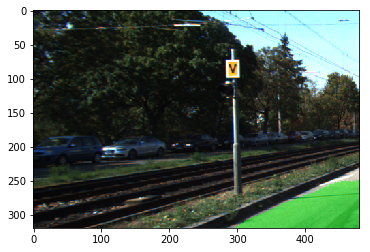

Accuracy :  0.8374098


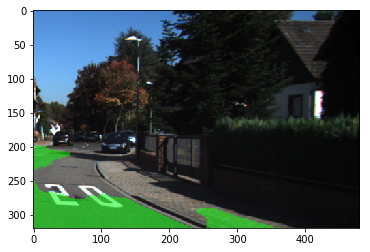

Accuracy :  0.6323463


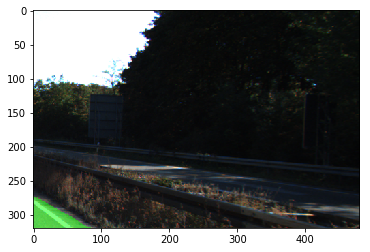

Accuracy :  0.76881176


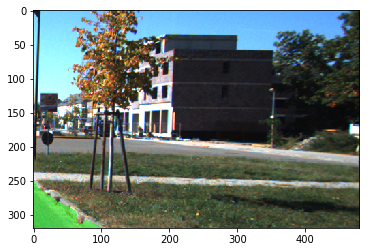

Accuracy :  0.7559669


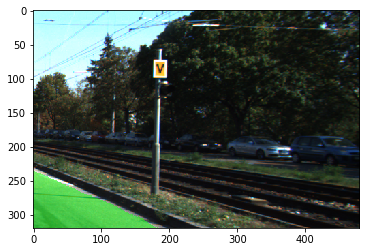

Accuracy :  0.85339373


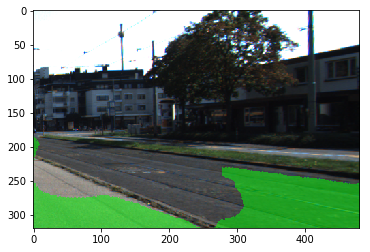

Accuracy :  0.46000975


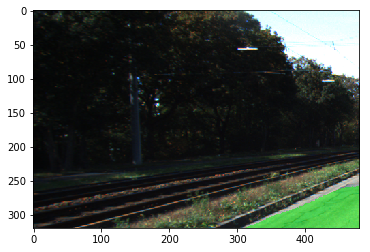

Accuracy :  0.80593127


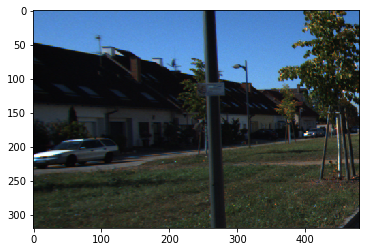

Accuracy :  0.021485036


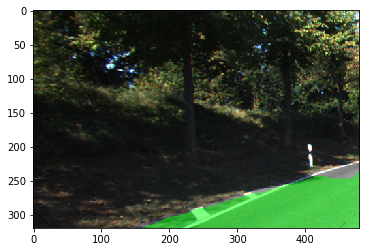

Accuracy :  0.85208386


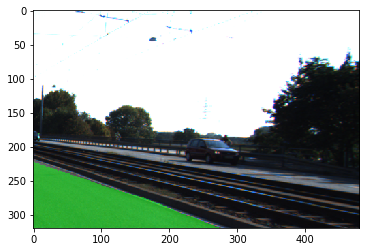

Accuracy :  0.8356998


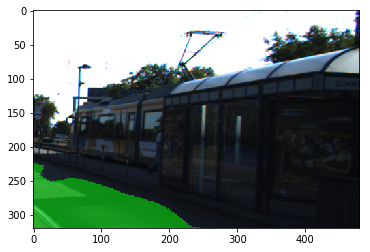

Accuracy :  0.74488086


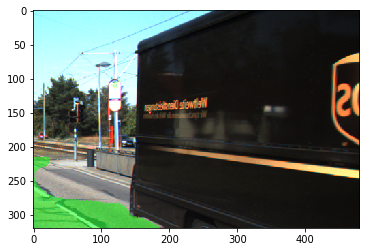

Accuracy :  0.64815694


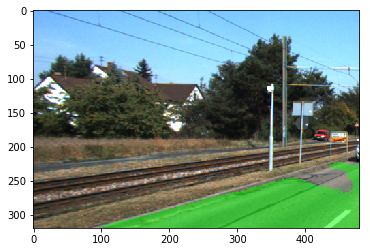

Accuracy :  0.77674156


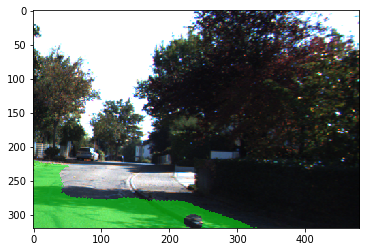

Accuracy :  0.6609233


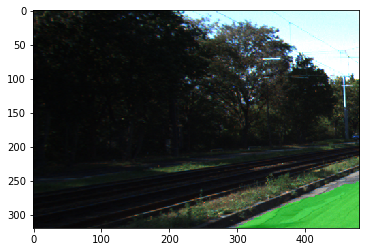

Accuracy :  0.8120768


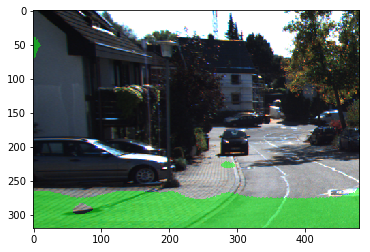

Accuracy :  0.39458746


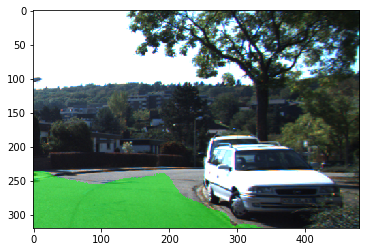

Accuracy :  0.7898521


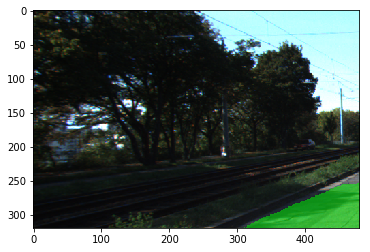

Accuracy :  0.79408306


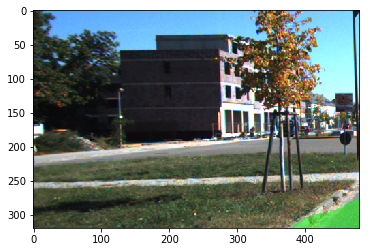

Accuracy :  0.68825346


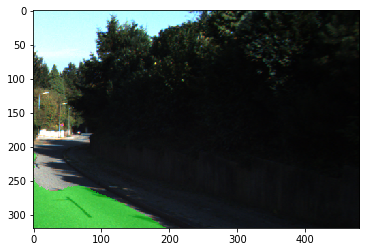

Accuracy :  0.6911388


In [14]:
with tf.Session() as sess:   
    print("Loading final model ")
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], config.final_model_dir)
    print("Final model loaded")
    test = [data.get_data_element("test_data",i) for i in range(20)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)

Variables initialized
Loading model checkpoint ./experiments\unet_kittiroad\checkpoint/-250 ...
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\checkpoint/-250
Model loaded


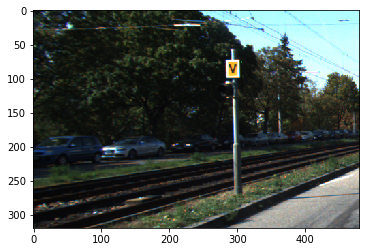

Accuracy :  0.10022458


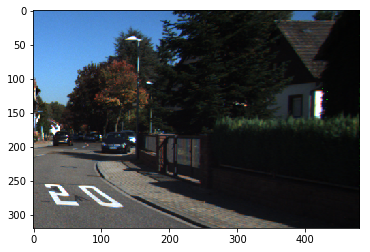

Accuracy :  0.17660242


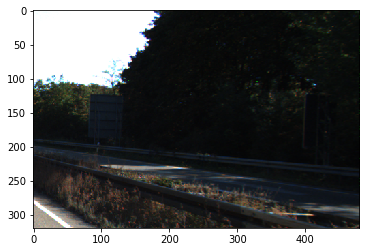

Accuracy :  0.02986964


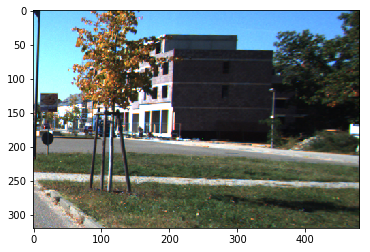

Accuracy :  0.03071231


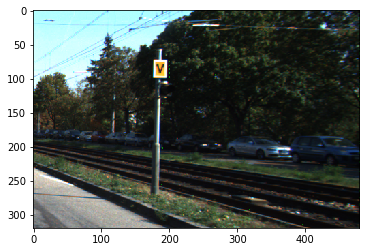

Accuracy :  0.10017721


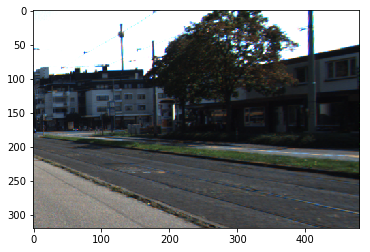

Accuracy :  0.14642893


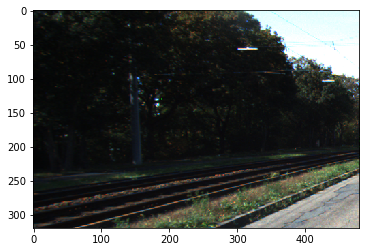

Accuracy :  0.08204154


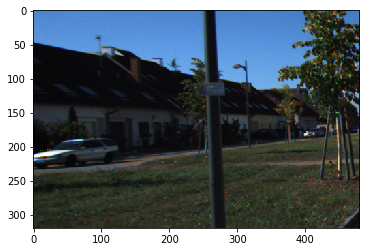

Accuracy :  5.3058637e-05


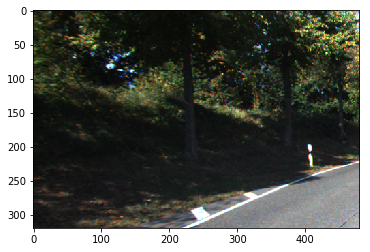

Accuracy :  0.16913977


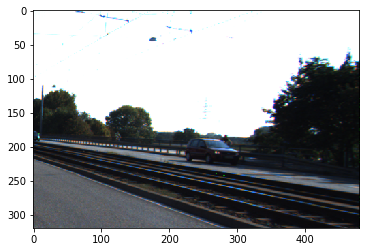

Accuracy :  0.16232435


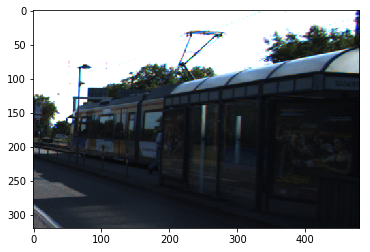

Accuracy :  0.17786732


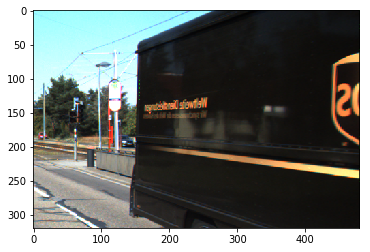

Accuracy :  0.12953922


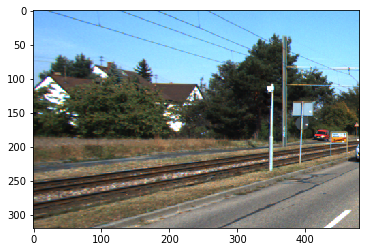

Accuracy :  0.17886645


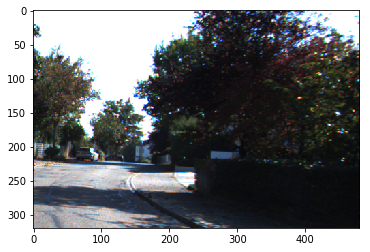

Accuracy :  0.16854939


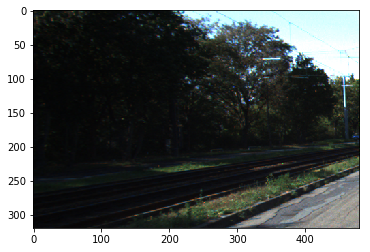

Accuracy :  0.09555708


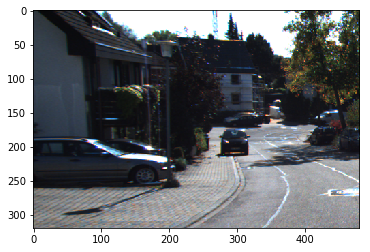

Accuracy :  0.23988791


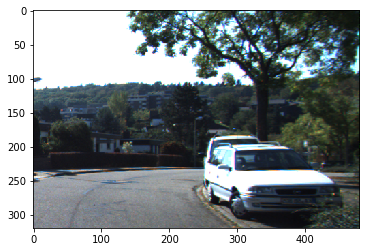

Accuracy :  0.21453309


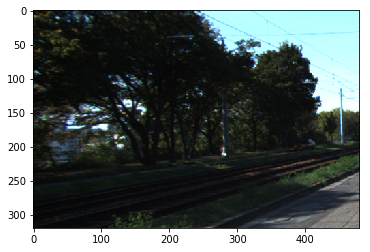

Accuracy :  0.09086487


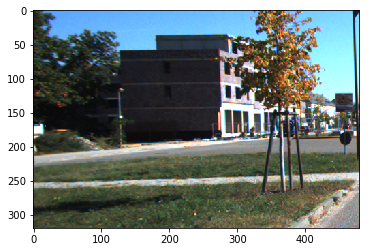

Accuracy :  0.030725483


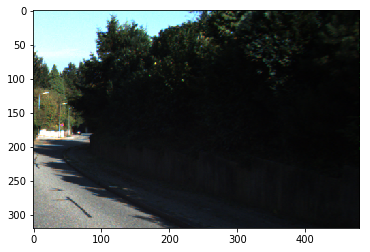

Accuracy :  0.15241519


In [7]:
with tf.Session() as sess:   
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
    model.load(sess)
    test = [data.get_data_element("test_data",i) for i in range(20)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)

In [8]:
# sess = tf.Session()
# logger = Logger(sess,config)
# trainer = RoadTrainer(sess,model,data,config,logger)
# model.load(sess)
# trainer.train()
# # test_saver = tf.train.Saver()
# # test_saver.save(sess,'./experiments/unet_kittiroad/checkpoint/final_model.ckpt')

In [9]:
# test = [data.get_data_element("test_data",i) for i in range(1)]
# model.load(sess)
# for item in test :
#     img = item[0]
#     mask = item[1]
#     model.predict(sess,img,mask)

In [10]:
# sess.close()

In [11]:
# tf.reset_default_graph()
# new_model = UNetModel(config)
# new_model.build()
# sess = tf.Session()
# test = [data.get_data_element("test_data",i) for i in range(5)]
# logger = Logger(sess,config)
# trainer = RoadTrainer(sess,new_model,data,config,logger)
# # sess.run(tf.global_variables_initializer())
# new_model.load(sess)
# # saver = tf.train.Saver()
# # saver = tf.train.import_meta_graph(config.checkpoint_dir +"final_model.ckpt.meta")
# # saver.restore(sess,config.checkpoint_dir+"final_model.ckpt.meta")
# print(new_model.best_loss.eval(sess))
# #     for item in test :
# #         img = item[0]
# #         mask = item[1]
# #         model.predict(sess,img,mask)
# sess.close()

In [12]:
# import scipy
# tf.reset_default_graph()
# init = tf.global_variables_initializer()
# saver = tf.train.import_meta_graph(tf.train.latest_checkpoint(config.checkpoint_dir)+".meta")
# # saver = tf.train.Saver()
# with tf.Session() as  sess : 
#     sess.run(init)
#     saver.restore(sess,tf.train.latest_checkpoint(config.checkpoint_dir))
#     graph =  tf.get_default_graph()
#     for op in graph.get_operations() :
#         print(op.name)
#     best_loss = sess.run('global_step/global_step:0')
#     print("best loss :",best_loss)
#     input_img = graph.get_tensor_by_name("inputs/X:0")
#     output_img = graph.get_tensor_by_name("output:0")
#     test = [data.get_data_element("test_data",i) for i in range(5)]
#     pred = sess.run(output_img, feed_dict={input_img : test})
#     print(pred.shape)
#     segmentation = np.argmax(pred,axis=1).reshape(320,480,1)
#     mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
#     mask = scipy.misc.toimage(mask, mode="RGBA")
#     street_im = scipy.misc.toimage(img)
#     street_im.paste(mask, box=None, mask=mask)
#     plt.imshow(street_im)
#     plt.show()
    

In [13]:
# sess = tf.Session()
# graph = tf.get_default_graph()
# with graph.as_default():
#     with sess.as_default():
#         saver = tf.train.import_meta_graph(tf.train.latest_checkpoint(config.checkpoint_dir)+".meta")
#         saver.restore(sess,tf.train.latest_checkpoint(config.checkpoint_dir))
#         #initializing all variables
#         sess.run(tf.local_variables_initializer())
#         best_loss = sess.run('best_loss:0')
#         print("best loss :",best_loss)
        
#         input_img = graph.get_tensor_by_name("inputs/X:0")
#         output_img = graph.get_tensor_by_name("output:0")
        
        